**Use this cell for notes and comments - will delete before submission:**
## **- Pull before pushing to github!!!**
- Each group is expected to prepare a 1 page (max 500 words) written proposal that identifies the dataset they plan to work on, as well as the question they would like to answer using that dataset for their group project. The proposal should be done in a Jupyter notebook, and then submitted both as an .html file (File -> Download As -> HTML) and an .ipynb file that is reproducible (i.e. works and runs without any additional files.)
- will leave descriptions for each section for now as we write but let's delete before submitting (EG)
- Google doc: https://docs.google.com/document/d/14MA5buy1aAFNB8jjsdWar8QPMuju9pH_iFZn3Zmtx9Q/edit

# Title

Group 005-36: Elena Greenall, Noah Hynds, Dillon Li

### **Introduction**
insrt . 

### **Preliminary Exploratory Data Analysis**
- Demonstrate that the dataset can be read from the web into R
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis).
- An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [2]:
#the first step is to import the necessary libraries
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Rows: 55692 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): gender, oral, tartar
dbl (24): ID, age, height(cm), weight(kg), waist(cm), eyesight(left), eyesig...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,HDL,LDL,triglyceride,fasting_blood_sugar,smoking
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
F,73,126,82,94,0
F,42,127,115,130,0
M,55,151,182,89,1
M,45,226,254,96,0
F,62,107,74,80,0
M,48,129,199,95,0


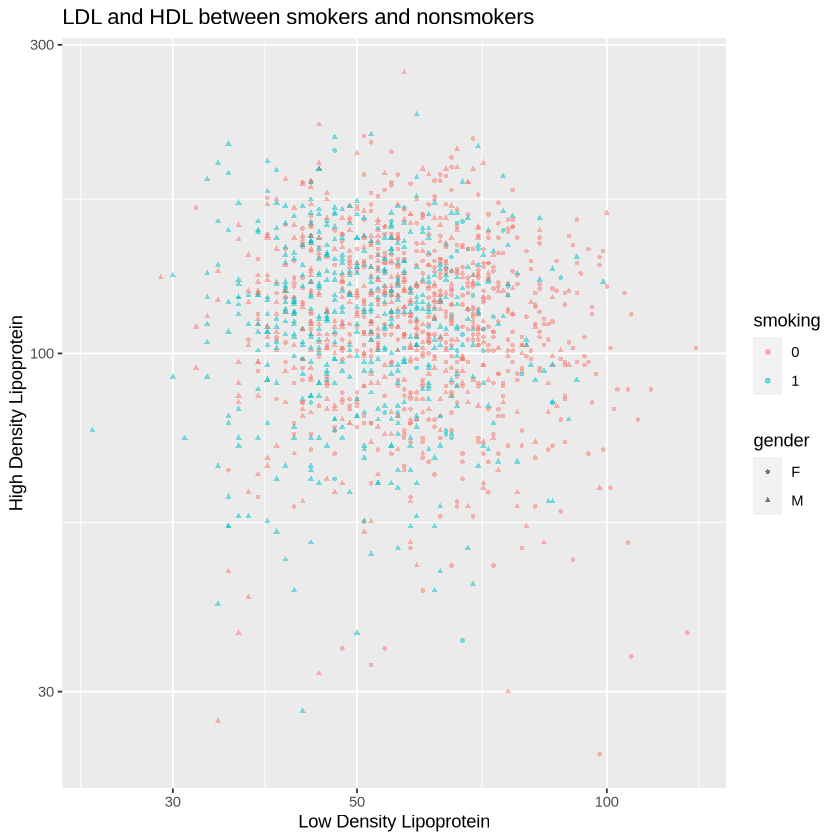

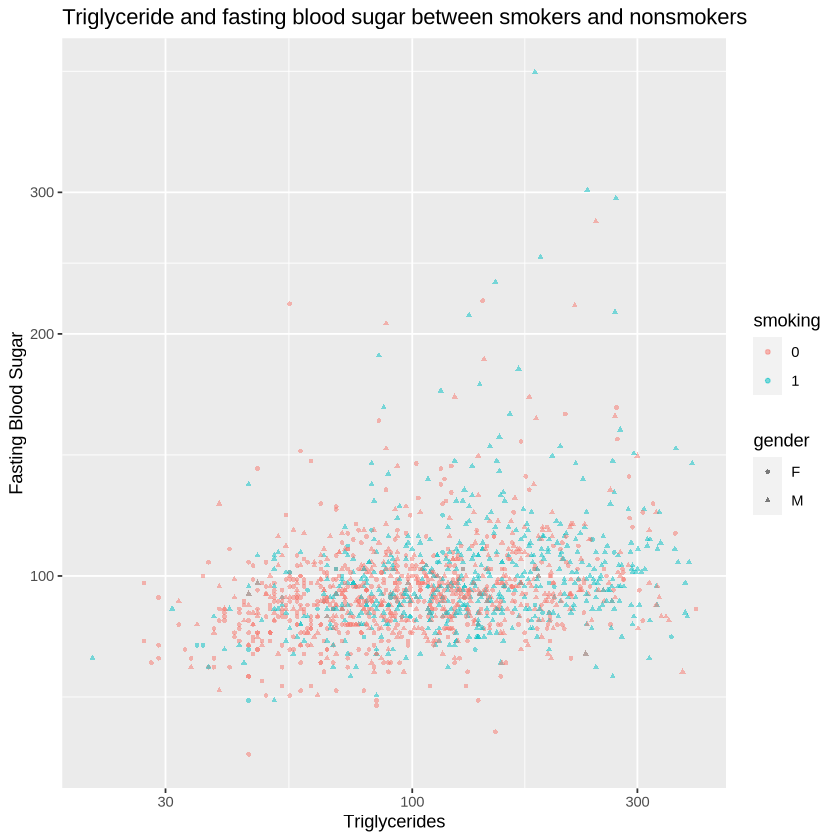

In [78]:
#next the dataset can be loaded and tidied
smoking_df <- read_csv("data/smoking.csv")
smoking_df <- mutate(smoking_df, smoking = as_factor(smoking))
colnames(smoking_df) <- c("ID", "gender","age", "height_cm", "weight_kg", "waist_cm", "eyesight_left", "eyesight_right", "hearing_left", "hearing_right", "systolic", "relaxation", "fasting_blood_sugar", "cholesterol", "triglyceride", "HDL", "LDL", "hemoglobin", "urine_protein", "serum_creatine", "AST", "ALT", "Gtp", "oral", "dental_carries", "tartar", "smoking")
smoking_df_subset <- slice(smoking_df, 1:1500)
smoking_df_subset <- select(smoking_df_subset, gender, HDL, LDL, triglyceride, fasting_blood_sugar, smoking)
head(smoking_df_subset)

smoking_training_plot_HDL_LDL <- ggplot(smoking_df_subset, aes(x = HDL, y = LDL)) + 
geom_point(alpha = 0.5, aes(color = smoking, shape = gender), size = 1) + 
labs(x = "Low Density Lipoprotein", y = "High Density Lipoprotein", title = "LDL and HDL between smokers and nonsmokers") + 
scale_x_log10() + 
scale_y_log10() 
smoking_training_plot_HDL_LDL

smoking_training_plot_triglycerides_fasting_blood_sugar <- ggplot(smoking_df_subset, aes(x = triglyceride, y = fasting_blood_sugar)) + 
geom_point(alpha = 0.5, aes(color = smoking, shape = gender), size = 1) + 
labs(x = "Triglycerides", y = "Fasting Blood Sugar", title = "Triglyceride and fasting blood sugar between smokers and nonsmokers") +
scale_x_log10() + 
scale_y_log10() 
smoking_training_plot_triglycerides_fasting_blood_sugar

### **Methods**
- Explain how you will conduct either your data analysis and which variables/columns you will use.
- Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction
- Describe at least one way that you will visualize the results

### **Expected Outcomes and Significance**
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

### **References**